# 2019 분석 남재환

In [17]:
import pandas as pd


DIR_PATH='../Data/'
FILE_NAME=DIR_PATH+'fire_allyear.csv'

fireall=pd.read_csv(FILE_NAME,encoding='CP949')

In [18]:
# 2019년도 자료 추출하기

fireall

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
0,2015,1,심야,경상남도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,2920
1,2015,1,심야,서울특별시,임야,"담뱃불, 라이터불",부주의,기타,임야,0,0,0,0
2,2015,1,심야,서울특별시,"자동차,철도차량","담뱃불, 라이터불",부주의,"침구,직물류","자동차,철도차량",0,0,0,137
3,2015,1,심야,서울특별시,"건축,구조물","담뱃불, 라이터불",부주의,"종이,목재,건초등","판매,업무시설",0,0,0,326
4,2015,1,심야,부산광역시,"건축,구조물",작동기기,부주의,식품,주거,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


In [19]:
# 2019 TRuer가 나오는지 체크

fireall2=fireall['년']==2019
fireall2

0         False
1         False
2         False
3         False
4         False
          ...  
214462     True
214463     True
214464     True
214465     True
214466     True
Name: 년, Length: 214467, dtype: bool

In [20]:
fireall3=fireall[fireall2]
fireall3

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
174364,2019,1,심야,강원도,기타(쓰레기 화재등),"폭발물, 폭죽",부주의,"종이,목재,건초등",기타,0,1,1,0
174365,2019,1,심야,경기도,"건축,구조물",미상,미상,미상,주거,0,0,0,14900
174366,2019,1,심야,서울특별시,"자동차,철도차량",미상,미상,미상,"자동차,철도차량",0,0,0,3642
174367,2019,1,심야,경기도,기타(쓰레기 화재등),화학적 발화열,화학적 요인,"종이,목재,건초등",기타,0,0,0,1848
174368,2019,1,심야,부산광역시,"건축,구조물",작동기기,전기적 요인,"전기,전자",기타서비스,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


# 강원도 및 경기도 재산피해 분석

In [21]:
#시도 기준 그룹화 후 합계 산출
#as_index=False를 사용한 이유, index 사용하지 않았을떄 원하는값이 나옴

fireall4=fireall3.groupby(['시도'], as_index=False).sum()
fireall4

,시도,년,월,사망,부상,인명피해(명)소계,재산피해소계
0,강원도,3983487,11354,16,140,156,253916322
1,경기도,19020999,56585,47,529,576,209842482
2,경상남도,6485028,19479,26,97,123,24091350
3,경상북도,5069709,14923,15,179,194,57418027
4,광주광역시,1704036,5453,10,51,61,4542558
5,대구광역시,2671137,8160,11,94,105,7224014
6,대전광역시,1772682,5658,9,62,71,4042309
7,부산광역시,4926360,15947,9,121,130,6242914
8,서울특별시,11873739,37233,37,361,398,92409010
9,세종특별자치시,385629,1210,0,8,8,2695492


In [22]:
# 산출된 값에서 원하는 컬럼만 추출해서 재산피해소계 규모로 순위 정함
# 강원도가 재산피해규모가 커서 강원도에 대해 분석함

fireall5=fireall4[['시도','재산피해소계']].sort_values('재산피해소계', ascending=False)
fireall5

,시도,재산피해소계
0,강원도,253916322
1,경기도,209842482
8,서울특별시,92409010
10,울산광역시,66995076
3,경상북도,57418027
16,충청북도,40761515
12,전라남도,26457996
2,경상남도,24091350
11,인천광역시,22507439
15,충청남도,19838416


In [23]:
fireall3

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
174364,2019,1,심야,강원도,기타(쓰레기 화재등),"폭발물, 폭죽",부주의,"종이,목재,건초등",기타,0,1,1,0
174365,2019,1,심야,경기도,"건축,구조물",미상,미상,미상,주거,0,0,0,14900
174366,2019,1,심야,서울특별시,"자동차,철도차량",미상,미상,미상,"자동차,철도차량",0,0,0,3642
174367,2019,1,심야,경기도,기타(쓰레기 화재등),화학적 발화열,화학적 요인,"종이,목재,건초등",기타,0,0,0,1848
174368,2019,1,심야,부산광역시,"건축,구조물",작동기기,전기적 요인,"전기,전자",기타서비스,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


In [24]:
#강원도에 대한 값만 가져오기 시작함


fireall6=fireall3['시도']=='강원도'
fireall6

174364     True
174365    False
174366    False
174367    False
174368    False
          ...  
214462    False
214463    False
214464    False
214465    False
214466    False
Name: 시도, Length: 40103, dtype: bool

In [25]:
fireall7=fireall3[fireall6]
fireall7

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
174364,2019,1,심야,강원도,기타(쓰레기 화재등),"폭발물, 폭죽",부주의,"종이,목재,건초등",기타,0,1,1,0
174384,2019,1,심야,강원도,기타(쓰레기 화재등),"불꽃, 불티",부주의,합성수지,기타,0,0,0,346
174395,2019,1,아침,강원도,"건축,구조물","불꽃, 불티",부주의,"종이,목재,건초등",집합시설,0,0,0,3910
174412,2019,1,아침,강원도,임야,"불꽃, 불티",부주의,"종이,목재,건초등",임야,0,0,0,0
174414,2019,1,아침,강원도,기타(쓰레기 화재등),"담뱃불, 라이터불",부주의,"종이,목재,건초등",기타,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214351,2019,12,심야,강원도,임야,"담뱃불, 라이터불",부주의,"종이,목재,건초등",임야,0,0,0,0
214374,2019,12,아침,강원도,기타(쓰레기 화재등),"불꽃, 불티",부주의,"종이,목재,건초등",기타,0,0,0,50
214410,2019,12,낮,강원도,"자동차,철도차량","마찰, 전도, 복사",기계적 요인,"자동차,철도차량,선박,항공기","자동차,철도차량",0,0,0,4950
214420,2019,12,낮,강원도,"건축,구조물",작동기기,기계적 요인,합성수지,산업시설,0,0,0,1212


In [26]:
# 강원도에  년 월 시간대 그리고 화재유형, 발화열원대분류, 재산피해소계로 분석


fireall8=fireall7[['시도','년','월','시간대','화재유형','발화열원대분류','발화요인대분류','재산피해소계']]
fireall8

,시도,년,월,시간대,화재유형,발화열원대분류,발화요인대분류,재산피해소계
174364,강원도,2019,1,심야,기타(쓰레기 화재등),"폭발물, 폭죽",부주의,0
174384,강원도,2019,1,심야,기타(쓰레기 화재등),"불꽃, 불티",부주의,346
174395,강원도,2019,1,아침,"건축,구조물","불꽃, 불티",부주의,3910
174412,강원도,2019,1,아침,임야,"불꽃, 불티",부주의,0
174414,강원도,2019,1,아침,기타(쓰레기 화재등),"담뱃불, 라이터불",부주의,0
...,...,...,...,...,...,...,...,...
214351,강원도,2019,12,심야,임야,"담뱃불, 라이터불",부주의,0
214374,강원도,2019,12,아침,기타(쓰레기 화재등),"불꽃, 불티",부주의,50
214410,강원도,2019,12,낮,"자동차,철도차량","마찰, 전도, 복사",기계적 요인,4950
214420,강원도,2019,12,낮,"건축,구조물",작동기기,기계적 요인,1212


In [27]:
# 강원도지역 화면 다시 보기

fireall8

,시도,년,월,시간대,화재유형,발화열원대분류,발화요인대분류,재산피해소계
174364,강원도,2019,1,심야,기타(쓰레기 화재등),"폭발물, 폭죽",부주의,0
174384,강원도,2019,1,심야,기타(쓰레기 화재등),"불꽃, 불티",부주의,346
174395,강원도,2019,1,아침,"건축,구조물","불꽃, 불티",부주의,3910
174412,강원도,2019,1,아침,임야,"불꽃, 불티",부주의,0
174414,강원도,2019,1,아침,기타(쓰레기 화재등),"담뱃불, 라이터불",부주의,0
...,...,...,...,...,...,...,...,...
214351,강원도,2019,12,심야,임야,"담뱃불, 라이터불",부주의,0
214374,강원도,2019,12,아침,기타(쓰레기 화재등),"불꽃, 불티",부주의,50
214410,강원도,2019,12,낮,"자동차,철도차량","마찰, 전도, 복사",기계적 요인,4950
214420,강원도,2019,12,낮,"건축,구조물",작동기기,기계적 요인,1212


In [28]:
#강원도 컬럼을 뺸후 다시 추출함

fireall9=fireall8[['년','월','시간대','화재유형','발화열원대분류','발화요인대분류','재산피해소계']].sort_values('재산피해소계', ascending=False)
fireall9

,년,월,시간대,화재유형,발화열원대분류,발화요인대분류,재산피해소계
187183,2019,4,저녁,임야,작동기기,전기적 요인,118520136
187211,2019,4,저녁,임야,미상,미상,74260991
193075,2019,5,저녁,"건축,구조물",기타,화학적 요인,34401558
204895,2019,9,아침,"건축,구조물",작동기기,미상,5582939
174554,2019,1,낮,"건축,구조물",작동기기,부주의,4158524
...,...,...,...,...,...,...,...
191644,2019,5,낮,임야,"불꽃, 불티",부주의,0
191667,2019,5,저녁,기타(쓰레기 화재등),"불꽃, 불티",부주의,0
191722,2019,5,아침,임야,"담뱃불, 라이터불",부주의,0
191762,2019,5,낮,기타(쓰레기 화재등),자연적 발화열,자연적인 요인,0


In [29]:
# 단위 천원
# 현재 제가 예상한 심야시간에 산불이 많을거라고 생각함
#  2019년에는 임야(산불)사건이 

fireall10=fireall9[fireall9.재산피해소계>50000] #5000만원 재산피해보다 큰 종류만 출력 
fireall10

,년,월,시간대,화재유형,발화열원대분류,발화요인대분류,재산피해소계
187183,2019,4,저녁,임야,작동기기,전기적 요인,118520136
187211,2019,4,저녁,임야,미상,미상,74260991
193075,2019,5,저녁,"건축,구조물",기타,화학적 요인,34401558
204895,2019,9,아침,"건축,구조물",작동기기,미상,5582939
174554,2019,1,낮,"건축,구조물",작동기기,부주의,4158524
174450,2019,1,낮,임야,"담뱃불, 라이터불",부주의,1990745
180207,2019,2,심야,"건축,구조물",미상,미상,1604891
177699,2019,1,아침,"건축,구조물",미상,미상,779724
174780,2019,1,저녁,"건축,구조물",화학적 발화열,화학적 요인,548773
185136,2019,3,아침,"건축,구조물",미상,미상,511838


In [30]:
fireall10.shape

(57, 7)

In [31]:
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm, rc
font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [32]:
# 화재유형에 종류 갯수 산출
# 산출 이유는 큰 규모의 재산피해소계에 어떤 유형에 많이 일어나는지 파악 해봄

pd.DataFrame(fireall10.groupby(['화재유형']).count()['재산피해소계'])


,재산피해소계
화재유형,
"건축,구조물",46
임야,4
"자동차,철도차량",7


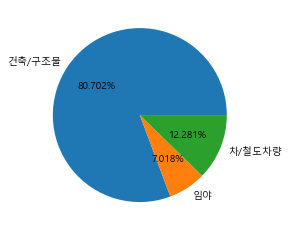

In [33]:
y=[46,4,7]
x=['건축/구조물','임야','차/철도차량']
plt.pie(y, labels=x, autopct='%.3f%%')
plt.show()

In [34]:
# 월 단위로 체크해봄
# 연말에 가까울수록 수치가 높아졌음
# 연말로 인해 부주의로 사건이 발생하는 것 같음

pd.DataFrame(fireall10.groupby(['월']).count()['재산피해소계'])

,재산피해소계
월,
1,9
2,3
3,3
4,5
5,7
6,4
7,1
8,1
9,8


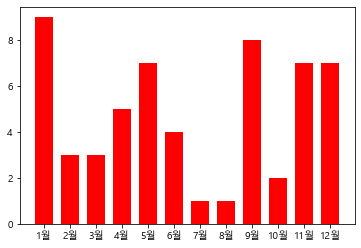

In [35]:
y=[9,3,3,5,7,4,1,1,8,2,7,7]
x=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
plt.bar(x,y, width=0.7, color='r')
plt.show()

In [36]:
#  어떤 시간대에 화재가 많이 발생 했는지 파악
#  심야에 화재가 많이 일어날거라 예측했지만 생각과 다르게 낮에 일어났음

pd.DataFrame(fireall10.groupby(['시간대']).count()['재산피해소계'])

,재산피해소계
시간대,
낮,19
심야,10
아침,15
저녁,13


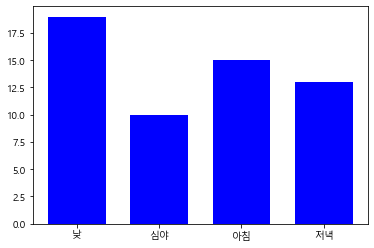

In [37]:
y=[19,10,15,13]
x=['낮','심야','아침','저녁']
plt.bar(x,y, width=0.7, color='b')
plt.show()

In [38]:
# 미상을 제외한 기계적요인, 전기적 요인, 부주의 등
# 안전확인교육이 필요할 것 같음 (특히 연말 연초에 안전교육 실시를 권장함)

pd.DataFrame(fireall10.groupby(['발화요인대분류']).count()['재산피해소계'])

,재산피해소계
발화요인대분류,
가스누출(폭발),1
기계적 요인,8
기타,2
미상,19
방화,1
방화의심,1
부주의,10
전기적 요인,12
화학적 요인,3


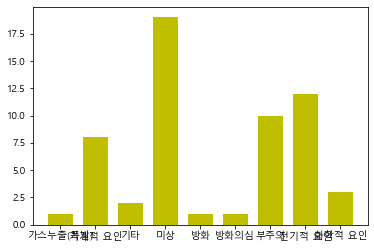

In [39]:
y=[1,8,2,19,1,1,10,12,3]
x=['가스누출(폭발)','기계적 요인','기타','미상','방화','방화의심','부주의','전기적 요인','화학적 요인']
plt.bar(x,y, width=0.7, color='y')
plt.show()

In [40]:
# 건축, 구조물에서 불꽃, 불티, 작동기기 등을 사용하는 것을 보아 공장시설인듯함
# 공장에서 화재가 나면 큰 규모로 번질 가능성이 있어 보임
# 작동기기 점검, 불꽃이 튀는 장비를 사용할떄 주위에 화재로 이어질 수 있는 재료가 있는지 파악해야할듯함


pd.DataFrame(fireall10.groupby(['발화열원대분류']).count()['재산피해소계'])

,재산피해소계
발화열원대분류,
기타,2
"담뱃불, 라이터불",3
"마찰, 전도, 복사",1
미상,17
"불꽃, 불티",10
작동기기,23
화학적 발화열,1


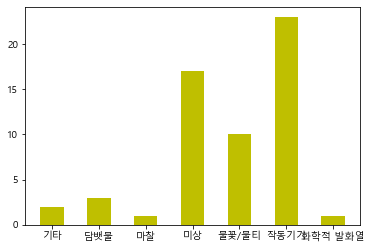

In [41]:
y=[2,3,1,17,10,23,1]
x=['기타','담뱃불','마찰','미상','불꽃/불티','작동기기','화학적 발화열']
plt.bar(x,y, width=0.5, color='y')
plt.show()

In [42]:
fireall3

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
174364,2019,1,심야,강원도,기타(쓰레기 화재등),"폭발물, 폭죽",부주의,"종이,목재,건초등",기타,0,1,1,0
174365,2019,1,심야,경기도,"건축,구조물",미상,미상,미상,주거,0,0,0,14900
174366,2019,1,심야,서울특별시,"자동차,철도차량",미상,미상,미상,"자동차,철도차량",0,0,0,3642
174367,2019,1,심야,경기도,기타(쓰레기 화재등),화학적 발화열,화학적 요인,"종이,목재,건초등",기타,0,0,0,1848
174368,2019,1,심야,부산광역시,"건축,구조물",작동기기,전기적 요인,"전기,전자",기타서비스,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


In [43]:
fireall3.groupby(['시도']).count()

,년,월,시간대,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
시도,,,,,,,,,,,,
강원도,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973
경기도,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421
경상남도,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212,3212
경상북도,2511,2511,2511,2511,2511,2511,2511,2511,2511,2511,2511,2511
광주광역시,844,844,844,844,844,844,844,844,844,844,844,844
대구광역시,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323,1323
대전광역시,878,878,878,878,878,878,878,878,878,878,878,878
부산광역시,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
서울특별시,5881,5881,5881,5881,5881,5881,5881,5881,5881,5881,5881,5881


In [44]:
fire_G=fireall3[fireall3['시도']=='경기도']
fire_G

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
174365,2019,1,심야,경기도,"건축,구조물",미상,미상,미상,주거,0,0,0,14900
174367,2019,1,심야,경기도,기타(쓰레기 화재등),화학적 발화열,화학적 요인,"종이,목재,건초등",기타,0,0,0,1848
174371,2019,1,심야,경기도,"건축,구조물","불꽃, 불티",부주의,식품,생활서비스,0,0,0,58
174377,2019,1,심야,경기도,"건축,구조물",미상,미상,미상,산업시설,0,0,0,47070
174380,2019,1,심야,경기도,"건축,구조물","담뱃불, 라이터불",부주의,"종이,목재,건초등",주거,0,0,0,1895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214447,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,1694
214451,2019,12,저녁,경기도,"건축,구조물","불꽃, 불티",부주의,기타,생활서비스,0,0,0,137180
214452,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,328
214456,2019,12,저녁,경기도,"건축,구조물",작동기기,기계적 요인,"침구,직물류",산업시설,0,0,0,1070


In [45]:
fire_G1=fire_G[['시도','시간대','화재유형','발화열원대분류','발화요인대분류','재산피해소계']].sort_values('재산피해소계', ascending=False)
fire_G1

,시도,시간대,화재유형,발화열원대분류,발화요인대분류,재산피해소계
201558,경기도,심야,"건축,구조물",미상,미상,9029699
200467,경기도,낮,"건축,구조물",미상,미상,8125405
185930,경기도,낮,"건축,구조물","불꽃, 불티",부주의,5237612
194262,경기도,낮,"건축,구조물","불꽃, 불티",부주의,4966045
191256,경기도,낮,"건축,구조물",작동기기,전기적 요인,3698427
...,...,...,...,...,...,...
185552,경기도,저녁,기타(쓰레기 화재등),"불꽃, 불티",부주의,0
196082,경기도,아침,기타(쓰레기 화재등),기타,부주의,0
195966,경기도,아침,기타(쓰레기 화재등),화학적 발화열,화학적 요인,0
197412,경기도,낮,임야,"불꽃, 불티",부주의,0


In [46]:
fire_G1=fire_G1[fire_G1.재산피해소계>50000]
fire_G1

,시도,시간대,화재유형,발화열원대분류,발화요인대분류,재산피해소계
201558,경기도,심야,"건축,구조물",미상,미상,9029699
200467,경기도,낮,"건축,구조물",미상,미상,8125405
185930,경기도,낮,"건축,구조물","불꽃, 불티",부주의,5237612
194262,경기도,낮,"건축,구조물","불꽃, 불티",부주의,4966045
191256,경기도,낮,"건축,구조물",작동기기,전기적 요인,3698427
...,...,...,...,...,...,...
204882,경기도,아침,"건축,구조물","담뱃불, 라이터불",부주의,50464
180527,경기도,심야,기타(쓰레기 화재등),미상,미상,50298
202638,경기도,낮,"자동차,철도차량",작동기기,기계적 요인,50160
193603,경기도,낮,"자동차,철도차량","마찰, 전도, 복사",기계적 요인,50160


In [47]:
# 강원도와 경기도와 재산피해소계 비교
# 강원도와 똑같이 건축/구조물에 대한 큰규모화재가 많았음


fire_G.groupby(['화재유형']).count()['재산피해소계']

화재유형
건축,구조물         6162
기타(쓰레기 화재등)    1598
선박,항공기            1
위험물,가스제조소등        8
임야              490
자동차,철도차량       1162
Name: 재산피해소계, dtype: int64

In [48]:
import numpy as np

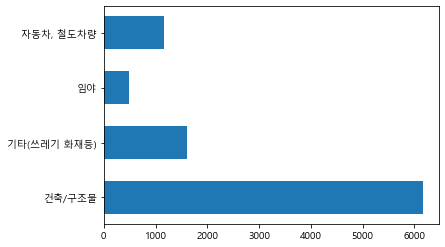

In [49]:
y = np.arange(4)
years = ['건축/구조물','기타(쓰레기 화재등)','임야','자동차, 철도차량']
values = [6162,1598,490,1162]

plt.barh(y, values, height=0.6)
plt.yticks(y, years)

plt.show()

In [50]:
# 경기도 지역은 연초에 다소 높은 수치를 보였지만 다른 월별도 적지않은 수치를 보였다.


fire_G.groupby(['월']).count()['재산피해소계']

월
1     1054
2      858
3     1004
4      852
5      912
6      637
7      729
8      673
9      650
10     642
11     664
12     746
Name: 재산피해소계, dtype: int64

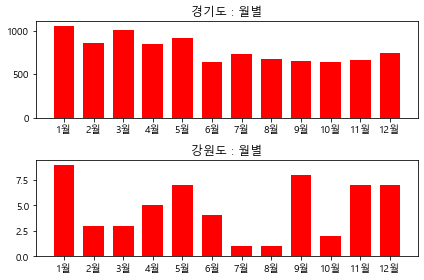

In [51]:
fig=plt.figure()

fig.add_subplot(211)

y=[1054,858,1004,852,912,637,729,673,650,642,664,746]
x=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
plt.title('경기도 : 월별')
plt.bar(x,y, width=0.7, color='r')


fig.add_subplot(212)
y=[9,3,3,5,7,4,1,1,8,2,7,7]
x=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
plt.bar(x,y, width=0.7, color='r')
plt.title('강원도 : 월별')

fig.tight_layout()
plt.show()

In [52]:
# 시간대별 수치는 강원도와 같이 낮에 화재가 많이 일어난 것을 볼 수 있다.
# 이렇게 보았을떄 확률적으로 낮에 활동하는 인구가 많기에 사건이 많다고 볼 수 있을 것 같다.

fire_G.groupby(['시간대']).count()['재산피해소계']

시간대
낮     3602
심야    1318
아침    2253
저녁    2248
Name: 재산피해소계, dtype: int64

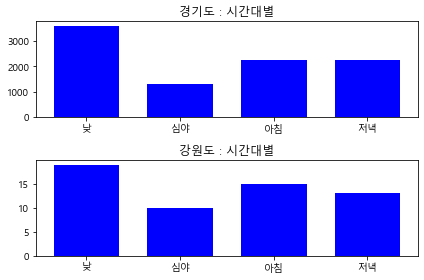

In [53]:
fig=plt.figure()

fig.add_subplot(211)

y=[3602,1318,2253,2248]
x=['낮','심야','아침','저녁']
plt.title('경기도 : 시간대별')
plt.bar(x,y, width=0.7, color='b')

fig.add_subplot(212)
y=[19,10,15,13]
x=['낮','심야','아침','저녁']
plt.title('강원도 : 시간대별')
plt.bar(x,y, width=0.7, color='b')

fig.tight_layout()
plt.show()

In [54]:
# 강원도와 크게 경기도의 다른점은 미상의 정보에 대한 것이며, 경기도권이 어떤게 화재가 났는지 정보작성 되었있음을 확인할 수 있고
# 강원도는 미상의 화재가 많은 것을 보아 예측해볼 수 있는 것은 화재의 보고 혹은 건물을 감시 할 수있는
# cctv와 경비의 미흡함 있을 것으로 보인다.

fire_G.groupby(['발화요인대분류']).count()['재산피해소계']

발화요인대분류
가스누출(폭발)      38
교통사고         110
기계적 요인      1164
기타           101
미상           682
방화            58
방화의심          90
부주의         4527
자연적인 요인       35
전기적 요인      2418
화학적 요인       198
Name: 재산피해소계, dtype: int64

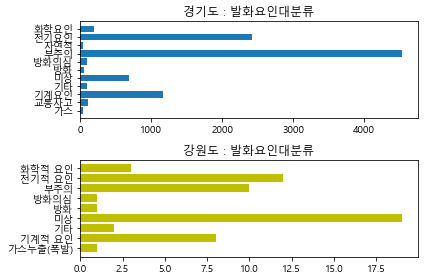

In [55]:
fig=plt.figure()

fig.add_subplot(211)
y = np.arange(11)
years = ['가스','교통사고','기계요인','기타','미상','방화','방화의심','부주의','자연적','전기요인','화학요인']
values = [38,110,1164,101,682,58,90,4527,35,2418,198]
plt.title('경기도 : 발화요인대분류')
plt.barh(y, values)
plt.yticks(y, years)



fig.add_subplot(212)
y=[1,8,2,19,1,1,10,12,3]
x=['가스누출(폭발)','기계적 요인','기타','미상','방화','방화의심','부주의','전기적 요인','화학적 요인']
plt.title('강원도 : 발화요인대분류')
plt.barh(x,y, color='y')

fig.tight_layout()
plt.show()

In [56]:
# 경기도와 강원도를 비교 해봤을때 작동기기에 대한 화재가 많았으며,
# 담배와, 불꽃에 연과을 지어본다면 이에 관한 교육도 필요해보인다.


fire_G.groupby(['발화열원대분류']).count()['재산피해소계']

발화열원대분류
기타             117
담뱃불, 라이터불     1972
마찰, 전도, 복사     723
미상             720
불꽃, 불티        1553
자연적 발화열         28
작동기기          4148
폭발물, 폭죽          6
화학적 발화열        154
Name: 재산피해소계, dtype: int64

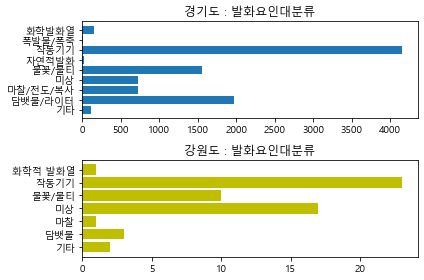

In [57]:
fig=plt.figure()

fig.add_subplot(211)
y = np.arange(9)
years = ['기타','담뱃불/라이터','마찰/전도/복사','미상','불꽃/불티','자연적발화','작동기기','폭발물/폭죽','화학발화열']
values = [117,1972,723,720,1553,28,4148,6,154]
plt.title('경기도 : 발화요인대분류')
plt.barh(y, values)
plt.yticks(y, years)

fig.add_subplot(212)
y=[2,3,1,17,10,23,1]
x=['기타','담뱃불','마찰','미상','불꽃/불티','작동기기','화학적 발화열']
plt.title('강원도 : 발화요인대분류')
plt.barh(x,y, color='y')

fig.tight_layout()
plt.show()

In [58]:
# 위 그래프를 종합적으로 보았을때 강원도의 특수한 상황인 산불을 제외하면
# 큰 규모의 화재(5000만원 이상의 재산피해)
# 건축물(공장)에 대한 화재가 많은 것을 예측해볼 수 있다.
# 연말 혹은 연초 안전교육과 같은 다양한 교육을 주기적으로 실시하는 방향으로 가야될 듯 하다.



In [59]:
fireall.columns

Index(['년', '월', '시간대', '시도', '화재유형', '발화열원대분류', '발화요인대분류', '최초착화물대분류',
       '장소대분류', '사망', '부상', '인명피해(명)소계', '재산피해소계'],
      dtype='object')

# 2019년 전체 분석

In [60]:
f2019_1=fireall3.groupby('월').count()['년'].sort_values(ascending=False)
f2019_1.head(3)

월
1    4430
3    4267
5    3990
Name: 년, dtype: int64

In [61]:
f2019_2=fireall3.groupby('시간대').count()['년'].sort_values(ascending=False)
f2019_2.head(3)

시간대
낮     15142
저녁     9853
아침     9390
Name: 년, dtype: int64

In [62]:
f2019_3=fireall3.groupby('시도').count()['년'].sort_values(ascending=False)
f2019_3.head(3)

시도
경기도      9421
서울특별시    5881
경상남도     3212
Name: 년, dtype: int64

In [63]:
f2019_4=fireall3.groupby('화재유형').count()['년'].sort_values(ascending=False)
f2019_4.head(3)

화재유형
건축,구조물         26025
기타(쓰레기 화재등)     7020
자동차,철도차량        4710
Name: 년, dtype: int64

In [64]:
f2019_5=fireall3.groupby('발화열원대분류').count()['년'].sort_values(ascending=False)
f2019_5.head(3)

발화열원대분류
작동기기         16376
담뱃불, 라이터불     7855
불꽃, 불티        7505
Name: 년, dtype: int64

In [65]:
f2019_6=fireall3.groupby('발화요인대분류').count()['년'].sort_values(ascending=False)
f2019_6.head(3)

발화요인대분류
부주의       20149
전기적 요인     9459
기계적 요인     4046
Name: 년, dtype: int64

In [66]:
f2019_7=fireall3.groupby('최초착화물대분류').count()['년'].sort_values(ascending=False)
f2019_7.head(3)

최초착화물대분류
종이,목재,건초등    9484
전기,전자        8231
쓰레기류         4522
Name: 년, dtype: int64

In [67]:
f2019_7=fireall3.groupby('장소대분류').count()['년'].sort_values(ascending=False)
f2019_7.head(3)

장소대분류
주거      11058
기타       7020
산업시설     5429
Name: 년, dtype: int64

In [68]:
f2019_8=fireall3.groupby('장소대분류').count()['년'].sort_values(ascending=False)
f2019_8.head(3)

장소대분류
주거      11058
기타       7020
산업시설     5429
Name: 년, dtype: int64